<a href="https://colab.research.google.com/github/kameoman/calendar/blob/main/calender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

     |████████████████████████████████| 7.4 MB 7.6 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.278 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 2.18.0 which is incompatible.


画像読み込み

In [14]:
!apt install tesseract-ocr libtesseract-dev tesseract-ocr-jpn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev tesseract-ocr tesseract-ocr-eng
  tesseract-ocr-jpn tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 40 not upgraded.
Need to get 8,939 kB of archives.
After this operation, 32.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Ge

In [15]:
!pip install pyocr

     |████████████████████████████████| 65 kB 3.3 MB/s 
  Created wheel for pyocr: filename=pyocr-0.8-py3-none-any.whl size=36951 sha256=1aab71bcf8f6b6cf202e68bf6f9d0097be9acb3df083c52890048af10706ebb4
  Stored in directory: /root/.cache/pip/wheels/ad/ca/be/7bf9a562ca9fd00f1097ad0a952c4f0b2584f1e046588ff192
Successfully built pyocr


In [16]:
from IPython.display import Image,display_png

In [55]:
from PIL import Image
import pyocr
import pyocr.builders
import cv2


tools = pyocr.get_available_tools()

#OCRが使えるかチェック
if len(tools) == 0:
    print('OCRツールが使えません')
    sys.exit(1)

tool = tools[0]

langs = tool.get_available_languages()


#OCRを行う画像を読み込み
from google.colab import files
f = files.upload()
#読み込んだ画像のファイル名
filename2 = list(f)[0]

results = tool.image_to_string( 
    Image.open(filename2), #ここを変更
    lang='jpn', 
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=6)
)

out = cv2.imread(filename2)
for box in results:
    cv2.rectangle(out, box.position[0], box.position[1],(0,0,255), 2)
cv2.imwrite('output.png', out)

# OCRを実行する画像イメージや言語指定、オプション指定
txt = tool.image_to_string( 
    Image.open(filename2), #ここを変更
    lang='jpn', 
    builder=pyocr.builders.TextBuilder(tesseract_layout=11)
)
print(txt)

Saving 20 21 8 25 20 21 8 25.jpg to 20 21 8 25 20 21 8 25 (1).jpg
2021 86825 20 21 625

テスト


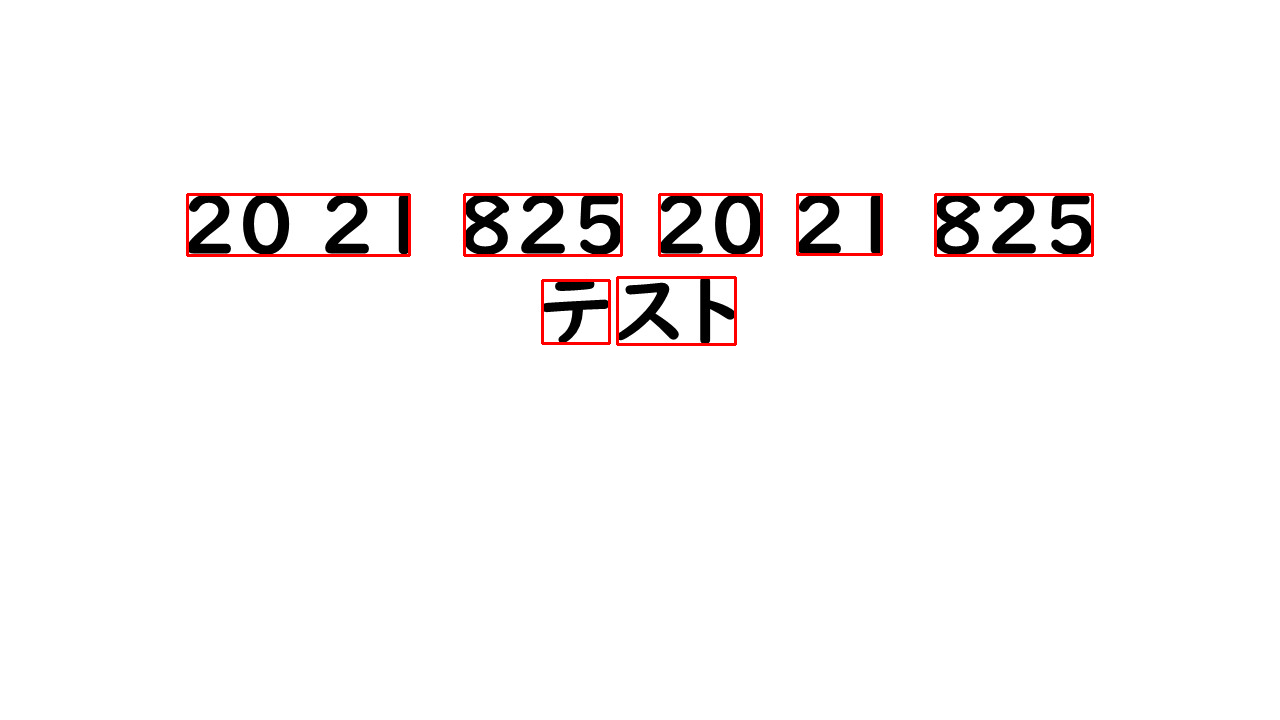

In [56]:
img_out = Image.open('output.png')
img_out

In [45]:
print(txt[0:4])
print(txt[5:6])
print(txt[7:9])
print(txt[22:25])

Z0Z1
8
25
スト


In [36]:
m = int(txt[5:6])
m

8

In [37]:
d = int(txt[7:9])
d

25

In [39]:
b = 'txt[22:25]'
b

'できたかの確認'

カレンダーへ書き込み

In [40]:
import datetime, re
import googleapiclient.discovery
import google.auth

# 編集スコープの設定(今回は読み書き両方OKの設定)
SCOPES = ['https://www.googleapis.com/auth/calendar']
# カレンダーIDの設定(基本的には自身のgmailのアドレス)
calendar_id = '3@gmail.com'
    
# 認証ファイルを使用して認証用オブジェクトを作成
gapi_creds = google.auth.load_credentials_from_file('', SCOPES)[0]
    
# 認証用オブジェクトを使用してAPIを呼び出すためのオブジェクト作成
service = googleapiclient.discovery.build('calendar', 'v3', credentials=gapi_creds)

# 追加するスケジュールの情報を設定
event= {
    # 予定のタイトル
    'summary': b,
    # 予定の開始時刻(ISOフォーマットで指定)
    'start': {
        'dateTime': datetime.datetime(2021, m, d, 0, 00).isoformat(),
        'timeZone': 'Japan'
    },
    # 予定の終了時刻(ISOフォーマットで指定)
    'end': {
        'dateTime': datetime.datetime(2021, m, d, 17, 59).isoformat(),
        'timeZone': 'Japan'
    },
}

# 予定を追加する
event = service.events().insert(calendarId = calendar_id, body = event).execute()